# 1. 신경망과의 첫 만남

1. 손글씨 숫자 분류를 학습하는 구체적인 신경망 예제 확인
2. MNIST 흑백 손글씨 숫자 이미지 (28x28 픽셀)


- MINIST 샘플 이미지
![샘플_이미지](./images/MNIST_sample.png)

### keras를 이용한 MINST 데이터 로드

In [1]:
import keras

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

print("훈련 이미지의 형상 : {}".format(train_images.shape))
print("훈련 라벨의 형상 : {}".format(train_labels.shape))
print("테스트 이미지의 형상 : {}".format(test_images.shape))
print("테스트 라벨의 형상 : {}".format(test_labels.shape))

Using TensorFlow backend.


훈련 이미지의 형상 : (60000, 28, 28)
훈련 라벨의 형상 : (60000,)
테스트 이미지의 형상 : (10000, 28, 28)
테스트 라벨의 형상 : (10000,)


- 변수 설명
    1. *_images = 모델이 학습, 테스트해야 할 이미지
    2. *_labels = 각 이미지들이 어떤 숫자인지를 알려주는 라벨(1차원 데이터)


- 훈련 이미지는 총 6만장의 28 * 28 픽셀 이미지이다.
- 테스트 이미지는 총 만장의 28 * 28 픽셀 이미지이다.


- 이미지는 넘파이 배열로 인코딩되어 있으며, 레이블은 0~9까지의 숫자 배열이다.


### 신경망 구성

In [2]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

- layer
    1. Dense 층 -> 각 노드가 완전연결 되어있는 층


- 활성화 함수
    1. relu -> 출력값이 0을 넘으면 출력값을 그대로 보내고, 0이하이면 0으로 보내는 함수
    2. softmax -> 각 요소의 출력값을 0~1 사이의 값으로 내보내고, 총합이 1이 되게하는 함수(각 라벨에 대한 퍼센트를 나타내게 할 때 자주 사용한다.)

- 훈련 준비를 마치기 위해 필요한 컴파일 단계
    1. 손실 함수(loss function): 신경망의 성능을 측정, 네트워크가 학습할 방향을 정한다.
    2. 옵티마이저(optimizer): 입력 데이터와 손실 함수를 사용하여 네트워크를 업데이트하는 방법
    3. 훈련과 테스트 과정을 모니터링할 지표: 정확도, loss값등 훈련이 잘 되었는지 확인하는 용도로 사용 됨 

In [3]:
network.compile(optimizer='rmsprop',            # mometum, Adagrad 같은 최적화 방법
               loss='categorical_crossentropy', # 이진 문제가 아니기 때문에 categorical을 사용한다.
               metrics=['accuracy'])            # 데이터의 라벨과 출력 데이터(예측 값)의 정확도를 측정

- 입력 데이터 전처리
    1. 입력 데이터를 0~1사이의 값으로 스케일 조정
    2. 네트워크에 맞는 크기로 변경
    
- 레이블의 전처리
    - (n,k) 크기의 2차원 배열로 변경 (n -> 훈련 데이터 개수,  k -> 클래스의 개수), one-hot 데이터

In [4]:
# 이미지 데이터 준비
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [5]:
# 레이블 준비
from keras.utils import to_categorical

print('기본 레이블 데이터 : {}'.format(train_labels[0]))

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print('전처리 한 레이블 데이터 : {}'.format(train_labels[0]))

기본 레이블 데이터 : 5
전처리 한 레이블 데이터 : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
# 네트워크 학습
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.2576 - accuracy: 0.9271
Epoch 2/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.1050 - accuracy: 0.9686
Epoch 3/5
60000/60000 [==============================] - 4s 58us/step - loss: 0.0687 - accuracy: 0.9794
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0495 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0373 - accuracy: 0.9887


- 테스트 데이터를 이용한 학습된 네트워크 평가

In [7]:
# 테스트 데이터에 대한 평가
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('테스트 데이터에 대한 평가 - 손실 함수 값: {}, 정확도 :{:%}'.format(test_loss, test_acc))

10000/10000 [==============================] - 0s 44us/step
테스트 데이터에 대한 평가 - 손실 함수 값: 0.06894429310966516, 정확도 :97.950000%


- 훈련 데이터에 대해서는 정확도가 98%인 반면, 테스트 데이터에 대해서는 97%의 정확도를 보인다. 이는 과대적합이 어느정도 일어났다는것을 의미한다.

# 2. 신경망을 위한 데이터 표현

- 텐서
    - 데이터를 위한 컨테이너
    - 임의의 차원 개수를 가지는 행렬의 일반화된 모습
    - 차원(dimension)을 축(axis)라고 부른다.

## 2.1. 스칼라(0D 텐서)

- 하나의 숫자만을 담고 있는 텐서
- numpy에서는 float32, float64 타입의 숫자 스칼라 텐서
- ndim을 이용하면 축의 개수를 확인할 수 있다.(스칼라 텐서의 축은 0개)
- 텐서의 축 개수를 rank라고도 부른다.

In [9]:
import numpy as np
x = np.array(12)
print("x의 값 : {}".format(x))
print("x의 축 개수 : {}".format(x.ndim))

x의 값 : 12
x의 축 개수 : 0


## 2.2. 벡터(1D 텐서)

- 숫자의 배열을 벡터 또는 1D 텐서라고 부른다.


### 1D 텐서의 예

In [12]:
x = np.array([12, 3, 6, 14, 7])
print("x의 값 : {}".format(x))
print("x의 축 개수 : {}".format(x.ndim))

x의 값 : [12  3  6 14  7]
x의 축 개수 : 1


- 위의 벡터는 5개의 원소를 가지므로 5D 벡터라고 부른다
- 5D 벡터 -> 하나의 축으로 5개의 차원을 가짐
- 5D 텐서 -> 5개의 축을 가짐

## 2.3. 행렬(2D 텐서)

- 벡터의 배열을 행렬 또는 2D 텐서라고 부른다.
- 2개의 축이 존재한다.


### 2D 텐서의 예

In [13]:
x = np.array([[5, 78, 2, 34, 0],
             [6,79, 3, 35, 1],
             [7, 80, 4, 36, 2]])
print("x의 값 : {}".format(x))
print("x의 축 개수 : {}".format(x.ndim))

x의 값 : [[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
x의 축 개수 : 2


- 첫 번째 축을 행, 두 번째 축을 열이라고 한다.

## 2.4. 3D 텐서와 고차원 텐서

- 행렬들을 하나의 배열로 합치면 3D 텐서가 된다.

### 3D 텐서의 예

In [15]:
x = np.array([[[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]]])
print("x의 값 : {}".format(x))
print("x의 축 개수 : {}".format(x.ndim))

x의 값 : [[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
x의 축 개수 : 3


## 2.5. 핵심 속성

- 텐서는 다음과 같은 3개의 핵심 속성을 가지고 있다.
    1. 축의 개수(rank) : 3D 텐서에는 3개의 축, 행렬에는 2개의 축이 있으며 numpy에서는 ndim 속성에 저장 되어있다.
    2. 크기(shape) : 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타내는 튜플 ex) (3,5) -> 1축에 3개의 차원 2축에 5개의 차원
    3. 데이터 타입 : 텐서에 포함된 데이터 타입 ex) float32, float64
    
    
### MNIST 데이터로 텐서 속성 확인하기

In [18]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  # 데이터 로드

print("훈련 이미지의 축 개수: {}".format(train_images.ndim))
print("훈련 이미지의 크기: {}".format(train_images.shape))
print("훈련 이미지의 데이터 타입 : {}".format(train_images.dtype))

훈련 이미지의 축 개수: 3
훈련 이미지의 크기: (60000, 28, 28)
훈련 이미지의 데이터 타입 : uint8


- 위 코드 출력으로 알 수 있는것
    1. 정수형 8비트 3D 텐서이다.
    2. 28 * 28 크기의 행렬이 6만개 있는 배열이다.
    
    
### Matplotlib를 사용하여 데이터 확인하기 

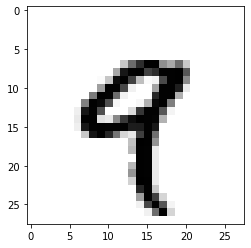

In [19]:
digit = train_images[4] # 훈련 이미지 중 5번째 이미지

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## 2.6. 넘파이로 텐서 조작하기

- 위 코드에서 digit 같이 배열의 특정 원소를 선택하는 것을 슬라이싱(slicing)이라고 한다.


### 슬라이스 예제

In [22]:
# 11 ~ 100번째를 슬라이스하여 배열을 만든다.

my_slice = train_images[10:100]
print("my_slice의 크기: {}".format(my_slice.shape))

my_slice의 크기: (90, 28, 28)


In [23]:
my_slice = train_images[10:100, :,:] # 이전과 동일하지만 2,3 번째 축의 범위도 설정함
print("my_slice의 크기: {}".format(my_slice.shape))

my_slice의 크기: (90, 28, 28)


In [24]:
my_slice = train_images[10:100, 0:28,0:28] 
print("my_slice의 크기: {}".format(my_slice.shape))

my_slice의 크기: (90, 28, 28)


my_slice의 크기: (90, 14, 14)


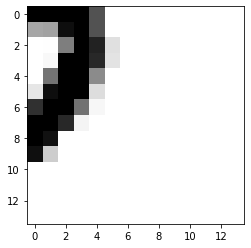

In [27]:
# 이미지에서 오른쪽 아래 14 * 14 픽셀 범위만 슬라이스
my_slice = train_images[10:100, 14:, 14: ] # : 다음에 아무 숫자도 쓰지 않으면 끝까지를 의미한다.
print("my_slice의 크기: {}".format(my_slice.shape))

plt.imshow(my_slice[0], cmap=plt.cm.binary)
plt.show()

my_slice의 크기: (60000, 14, 14)


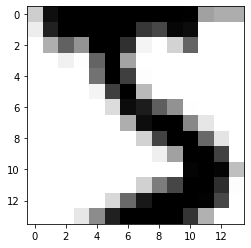

In [28]:
# 음수 인덱스를 사용한 슬라이싱
my_slice = train_images[:, 7:-7, 7:-7]
print("my_slice의 크기: {}".format(my_slice.shape))

plt.imshow(my_slice[0], cmap=plt.cm.binary)
plt.show()

## 2.7. 배치 데이터

- 일반적으로 딮러닝에서 텐서의 첫 번째 축은 샘플 수이다.
- 전체 데이터를 나누어 작은 배치를 만든다.


### 배치 데이터 생성 예

In [31]:
batch = train_images[:128] # 0~127

batch = train_images[128:256] # 128 ~ 255

# n번째 배치 데이터 생성
# batch = train_images[128 * n:128 * (n + 1)]

이렇게 배치 데이터를 다룰 때 첫 번째 축을 배치 축이라고 한다.

## 2.8. 텐서의 실제 사례

- 데이터의 종류
    1. 벡터 데이터
    2. 시계열 데이터
    3. 이미지
    4. 동영상

# 3. 텐서 연산

- 케라스에서 Dense 층 - keras.layers.Dense(512, activation='relu')
- 위 함수를 풀었을 때 적용되는 연산
    - output = relu(dot(W, input) + b)
    - 위에서 쓰이는 연산
        1. 점곱
        2. 덧셈
        3. relu (max(0, x))

## 3.1. 원소별 연산

- relu 함수와 덧셈은 원소별 연산이다.
- 텐서에 있는 각 원소에 독립적으로 적용됨


### 단순한 relu, 덧셈 연산 구현

In [36]:
def navie_relu(x):
    assert len(x.shape) == 2
    
    x = x.copy()
    
    # 모든 x안의 원소를 돌면서 relu를 적용한다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i,j], 0)
    
    return x

def navie_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    
    # 모든 x안의 원소를 돌면서 뎃셈을 적용한다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    
    return x

### numpy를 사용한 단순한 relu, 덧셈 연산 구현

In [38]:
import numpy as np

# z = x + y 덧셈 연산
# z = np.maximum(z, 0) ReLU 연산

## 3.2. 브로드캐스팅

- 크기가 다른 두 텐서가 더해질 때 사용 됨
- 브로드캐스팅의 단계
    1. 큰 텐서의 ndim에 맞도록 작은 텐서에 축이 추가
    2. 작은 텐서가 새축을 따라서 큰 텐서의 크기에 맞도록 반복
    

### 구체적인 예
1. x = (32, 10), y = (10,) 인 크기를 가진다고 가정
2. y에 비어 있는 첫번째 축을 추가 y = (1, 10)이 됨
3. y축에 2번을 32번 반복 y = (32, 10)으로 변경
4. x와 y의 크기가 같아졌으므로 더할 수 있다.


- 단 새로운 텐서가 만들어지는 것은 비효율적이므로 실제로 만들지는 않는다.


### 코드 예

In [39]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2 # 2D 넘파이 배열
    assert len(y.shape) == 1 # 넘파이 벡터
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[j] # 이렇게 새로 축을 만들지는 않고 각 축에다 더해준다.

    return x

## 3.3. 텐서 점곱

- numpy, 케라스에스는 dot 연산자를 사용
- 원소의 개수가 같은 벡터끼리 점곱이 가능
- 두 텐서 중 하나라도 ndim이 1보다 크면 dot 연산에 교환 법칙이 성립 되지 않는다.
- (a,b) dot (b,c) = (a,c)로 크기가 변화된다.

## 3.4. 텐서 크기 변환

- 보통 전처리 할 때 사용
- 특정 키기에 맞게 열과 행을 재배열

## 3.5. 텐서 연산의 기하학적 해석

- 텐서의 내용은 기하학적 공간에 있는 좌표 포인트로 해석 가능

# 4. 신경망의 엔지: 그래디언트 기반 최적화

- 이전에 보았던 신경망의 각 층은 입력 데이터를 다음과 같이 변환한다.
   - output = relu(dot(W, input) * b)

- 여기서 W, b는 층의 가중치, 편향이라고 부른다

- 훈련이란 이 W, b를 반복하여 업데이트 하는것을 말한다.